# How to Energy Rating

This Notebook explains how to use the code for the Energy Rating Standard [1], created by Dorian Guzman and modified by Mariella Rivera. The code is:

* Energy Rating simulation (based on Interpolation code from Anton Driesse)- IEC 61853

For this example, a location from the standard is chosen (IEC 61853-4) and module data from CalLab is used.

[1] Energy Rating Standard IEC61853-1 to -4

In [1]:
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

Adding the folder with the functions

In [2]:
import sys
sys.path.append(r"O:\200\290_AMK\90_Studenten\Mariella_Rivera\phD\ER_Software-Benchmarking\energy_rating_v05_MR")

## Importing functions

In [5]:
import run_main as run
import read_functions
import pandas as pd
import utils
import plotting

Defining the paths and folders

In [3]:
# Folder with the standard's files
folder_locations = "the_standard"
# Folder with the module's data
folder = r"O:\200\290_AMK\90_Studenten\Mariella_Rivera" +\
        r"\phD\ER_Software-Benchmarking\energy_rating_v05_MR\example_data"
# File with the data
data_file = "callab_test_file.txt"

## Simulation for one standard climate
## Set standard climate

In [7]:
location = 5
std_location = read_functions.read_standard_locations(location)

std_location

{'loc': 'enra_temperate_continental.csv',
 'site_lat': 57,
 'site_lon': -112,
 'site_ele': 465,
 'site_name': 'Temperate continental',
 'pv_tilt': 20,
 'pv_azimuth': 180}

## Reading CalLab's Data

In [15]:
(mod_parameters, spec_resp, power_matrix, ar,
         u0, u1, module_area, tech) = read_functions.read_callab_stdfile(path = folder,
                                                                         data_file = data_file)
# Module's parameters
print(mod_parameters)

0     Order_ID Internal_ID  Producer      Module_Type Technology  \
1  001ABCD0521     ABCD001  JA Solar  JAM72D30-535/MB    mono-Si   

0    Serial_Number Number_of_cells Module_Length[mm] Module_Width[mm]  \
1  12342314ABC2342              60              2285             1134   

0 Module_Area_[m2]  
1            2.591  


In [18]:
# Module's Sprectral Response
# Wavelenght / SR
spec_resp.head()

290.0    0.000
350.0    0.299
375.0    0.342
401.0    0.391
425.0    0.424
dtype: float64

In [17]:
# Power Matrix
power_matrix.head()

,gmean,temp,pmpp
1,1100.0,75.0,338.5
2,1000.0,75.0,307.2
3,900.0,75.0,275.8
4,800.0,75.0,244.3
5,700.0,75.0,212.9


In [22]:
# Other paramaters
print("Angle of incidence empirical factor (ar): %s" %ar)
print("Thermal coefficient- irradiance impact (u0): %s" %u0)
print("Thermal coefficient- wind impact (u1): %s" %u1)
print("Module area [m2]: %s" %module_area)
print("Module technology : %s" %tech)

Angle of incidence empirical factor (ar): 0.152
Thermal coefficient- irradiance impact (u0): 27.3
Thermal coefficient- wind impact (u1): 5.61
Module area [m2]: 2.591
Module technology : mono-Si


## Getting initial data

In [23]:
(eta_interpolated, pnom, eta_matrix, climate_data, alpha) = run.get_ini_data(
            module_df = power_matrix,
            eta= False,
            module_area = module_area,
            folder_locations=folder_locations,
            site_name=std_location["loc"])

In [24]:
eta_matrix

t_round,15.0,25.0,50.0,75.0
g_round,,,,
100.0,0.930814,0.900250,NaN,NaN
200.0,0.969714,0.940539,NaN,NaN
300.0,0.989164,0.961378,NaN,NaN
400.0,1.001667,0.973882,0.898166,NaN
500.0,1.012503,0.985274,0.911364,NaN
600.0,1.016949,0.991479,0.918311,0.839585
700.0,1.019728,0.994721,0.923272,0.845076
800.0,1.021812,0.997499,0.926646,0.848500
900.0,1.022815,0.999043,0.928962,0.851471


In [26]:
# Matrix with inter/extrapolations
eta_interpolated_df = pd.DataFrame(eta_interpolated.values, index=eta_matrix.index, columns=eta_matrix.columns)
eta_interpolated_df

t_round,15.0,25.0,50.0,75.0
g_round,,,,
100.0,0.930814,0.900250,0.824535,NaN
200.0,0.969714,0.940539,0.864824,NaN
300.0,0.989164,0.961378,0.885663,0.806937
400.0,1.001667,0.973882,0.898166,0.819441
500.0,1.012503,0.985274,0.911364,0.832639
600.0,1.016949,0.991479,0.918311,0.839585
700.0,1.019728,0.994721,0.923272,0.845076
800.0,1.021812,0.997499,0.926646,0.848500
900.0,1.022815,0.999043,0.928962,0.851471


In [29]:
# Nominal power
pnom #kW

0.3599

In [30]:
# Power temperature coefficient
alpha

array([0.00299768])

## Running simulation

In [31]:
sim_er_df, ret_df = run.get_simulation(
    climate_data=climate_data,
    lat=std_location["site_lat"],
    lon=std_location["site_lon"],
    ele=std_location["site_ele"],
    alpha=alpha,
    tech=tech,
    pnom=pnom,
    mod_area=module_area,
    eta_interpolated=eta_interpolated,
    u0=u0,
    u1=u1,
    pv_azimuth=std_location["pv_azimuth"],
    pv_tilt=std_location["pv_tilt"],
    a_r=ar,
    spec_resp_factor=spec_resp
    )

In [33]:
# Dataframe results
sim_er_df.head(5)

,T_amb,wind,elev_sun,IncidentAngle,ghor,ihor,G_tlt,I_tlt,"Inclined global spectral irradiance,306.8-327.8nm",327.8-362.5nm,...,3991.0-4605.65nm,dhor,D_tlt,b_aoi,d_aoi,g_aoi,g_spec,T_mod,eta,Pout
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:15:06,-12.687,1.5433,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.687,0.980384,0.0
2015-01-01 01:15:06,-13.043,1.4267,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.043,0.981521,0.0
2015-01-01 02:15:06,-13.400,1.3100,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.400,0.982662,0.0
2015-01-01 03:15:06,-13.617,1.1567,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.617,0.983355,0.0
2015-01-01 04:15:06,-13.833,1.0033,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.833,0.984045,0.0


In [35]:
# Climate Specific Energy Rating (CSER) / Average Efficiency (ETA)
ret_df

,cser_ER,eta_avg_ER
0,0.950242,0.131182


# Results

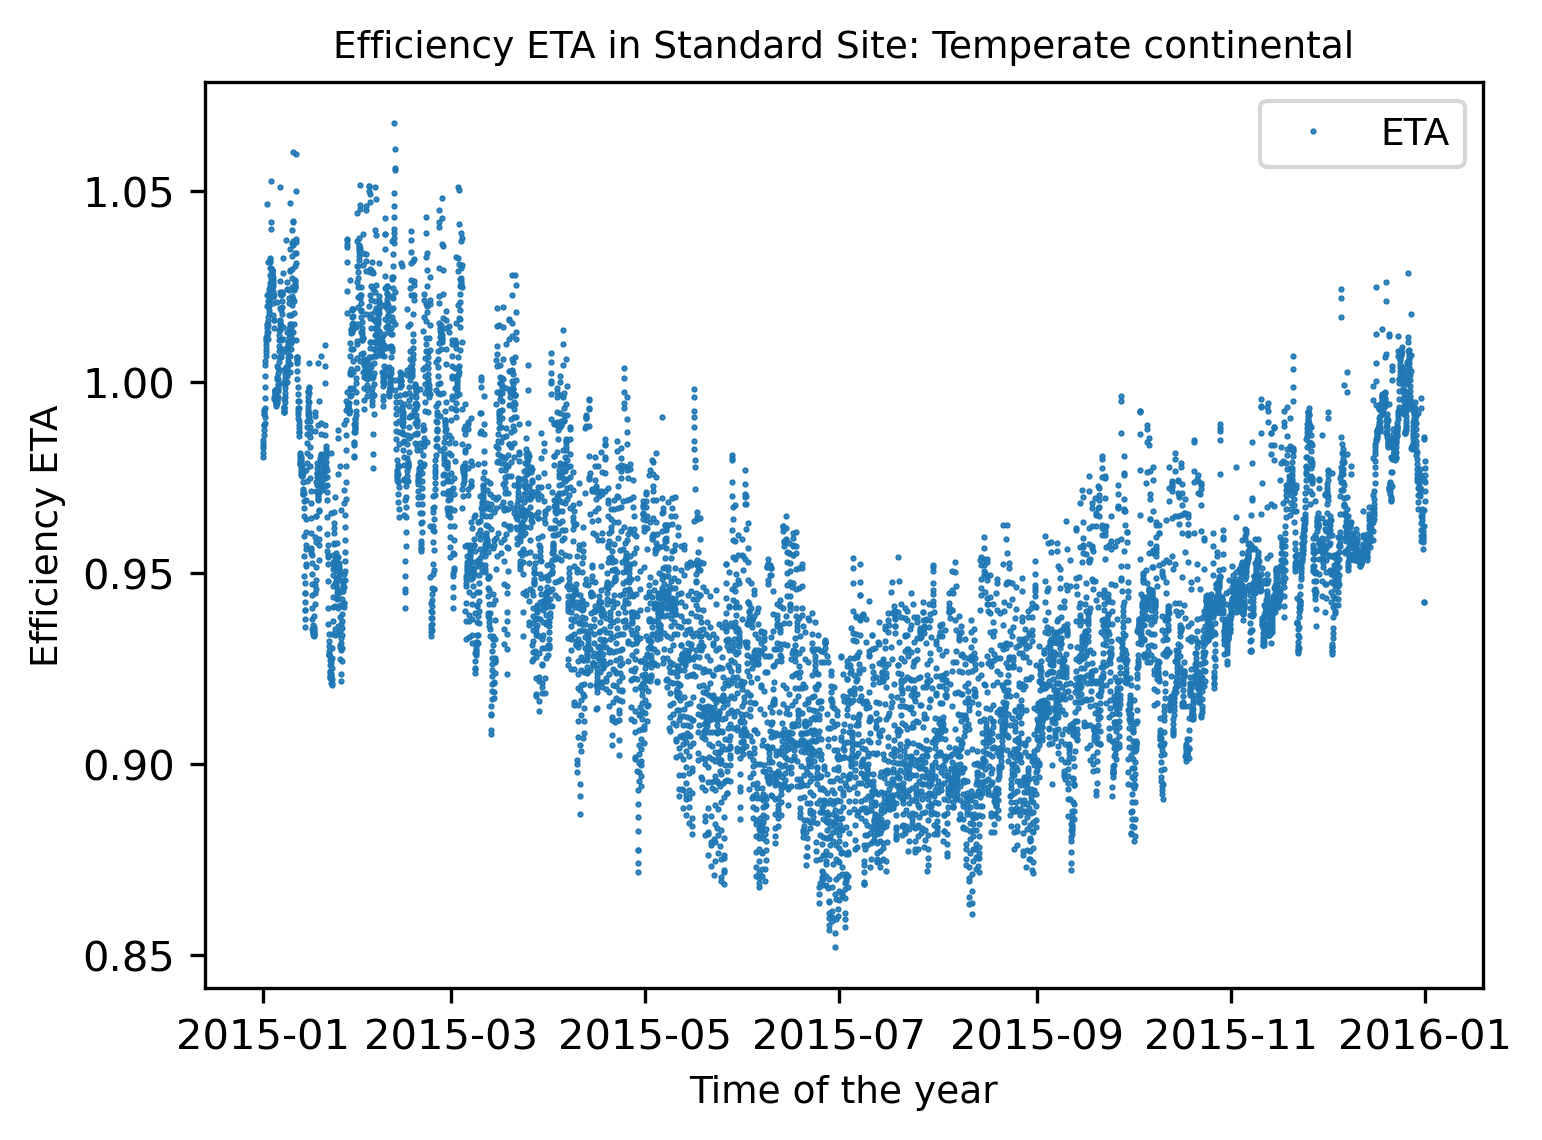

In [51]:
 # Plot ETA
%matplotlib inline
plotting.plot_eta(df = sim_er_df,
                  res_folder= r'O:\200\290_AMK\90_Studenten\Mariella_Rivera\phD\ER_Software-Benchmarking\energy_rating_v05_MR\Results\eta_plots',
                  mod_parameters = mod_parameters,
                  location = std_location)

## Simulation for the 6 standard climates

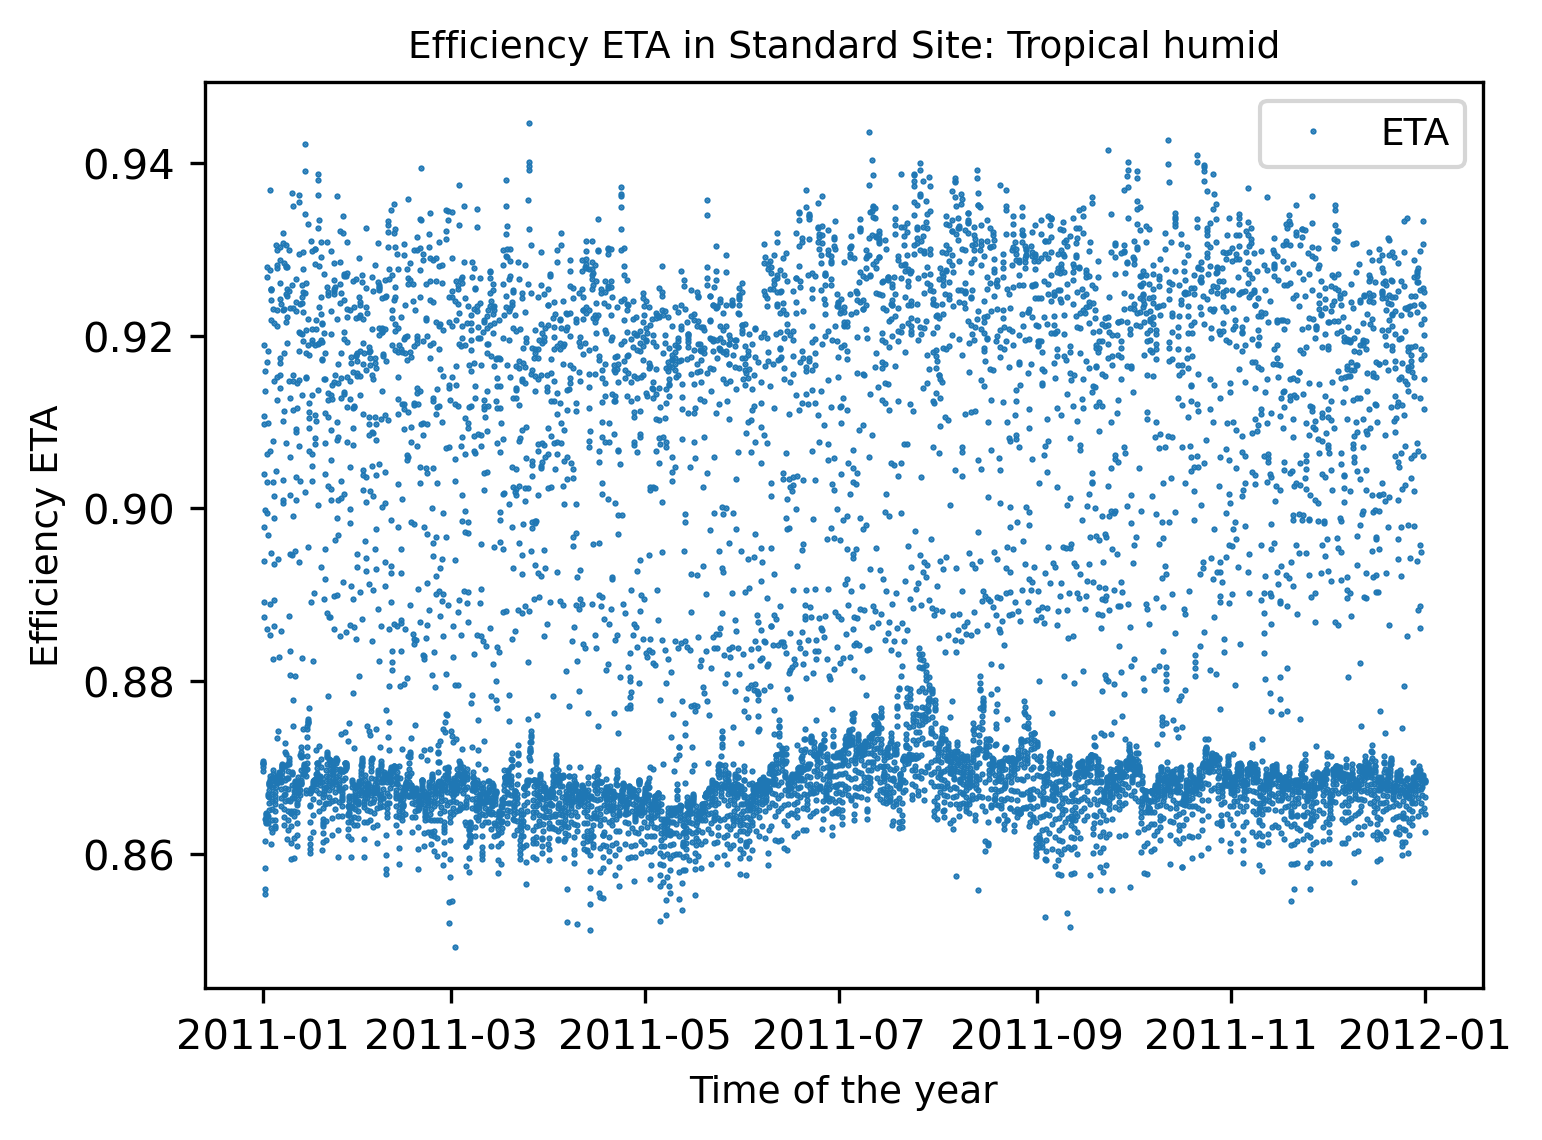

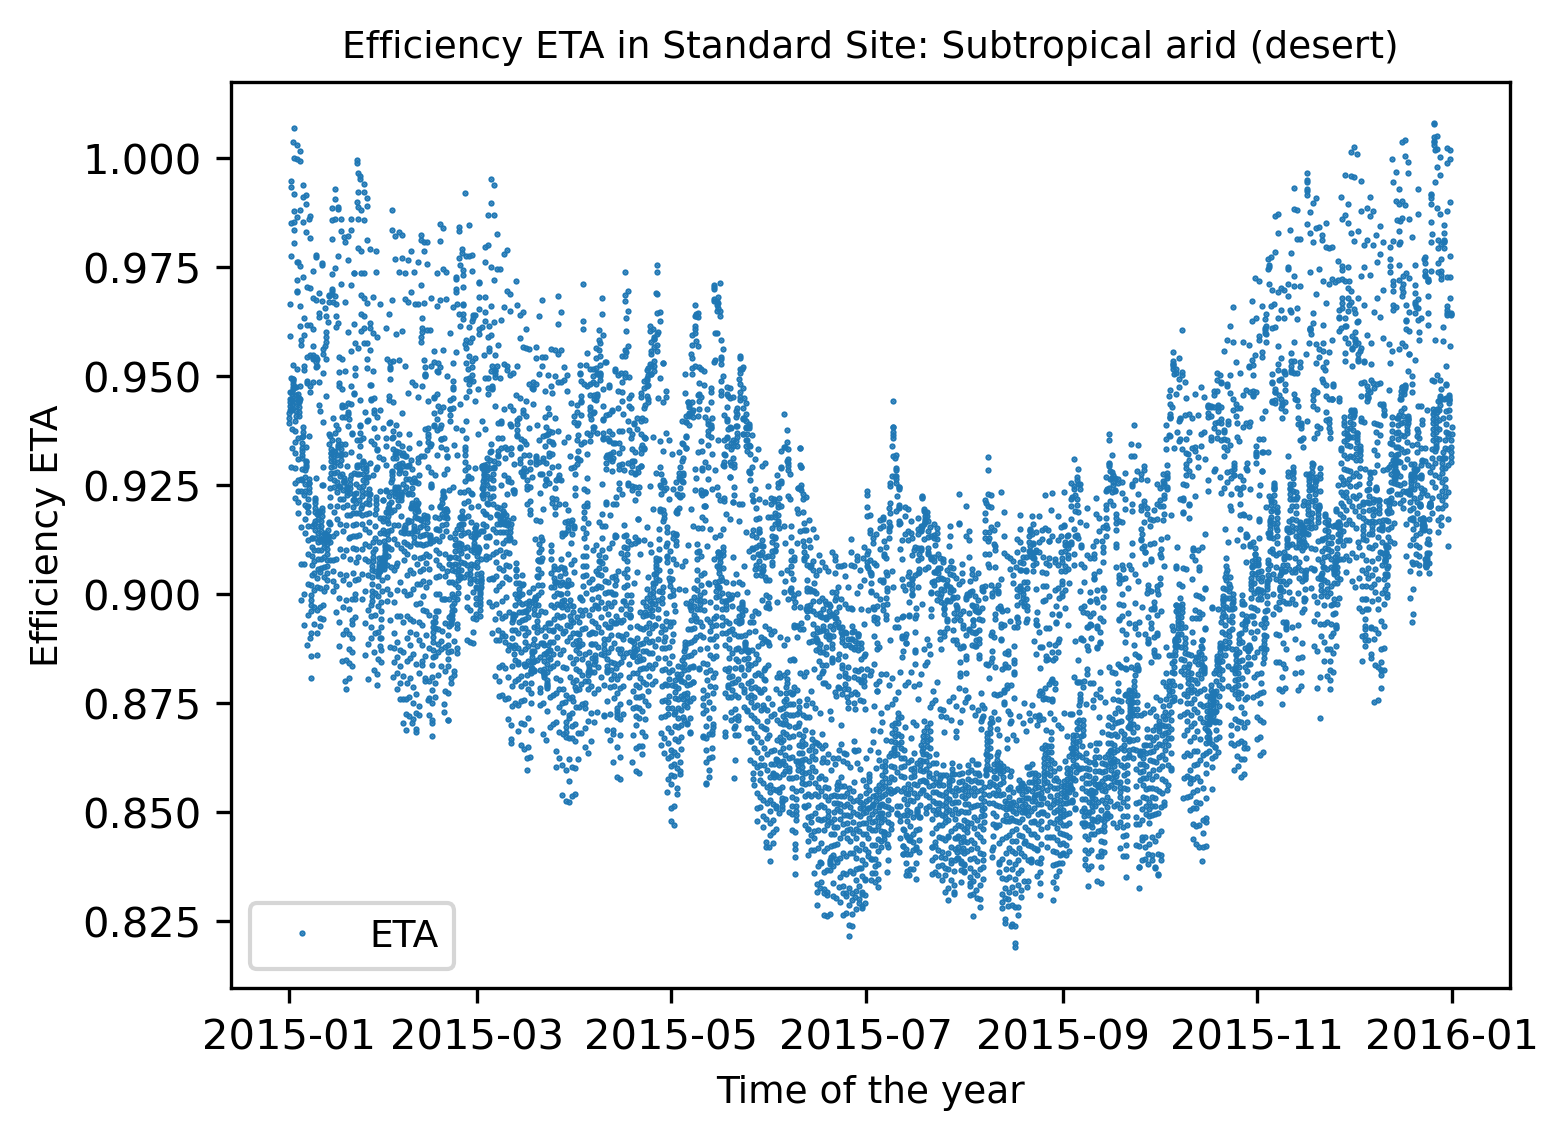

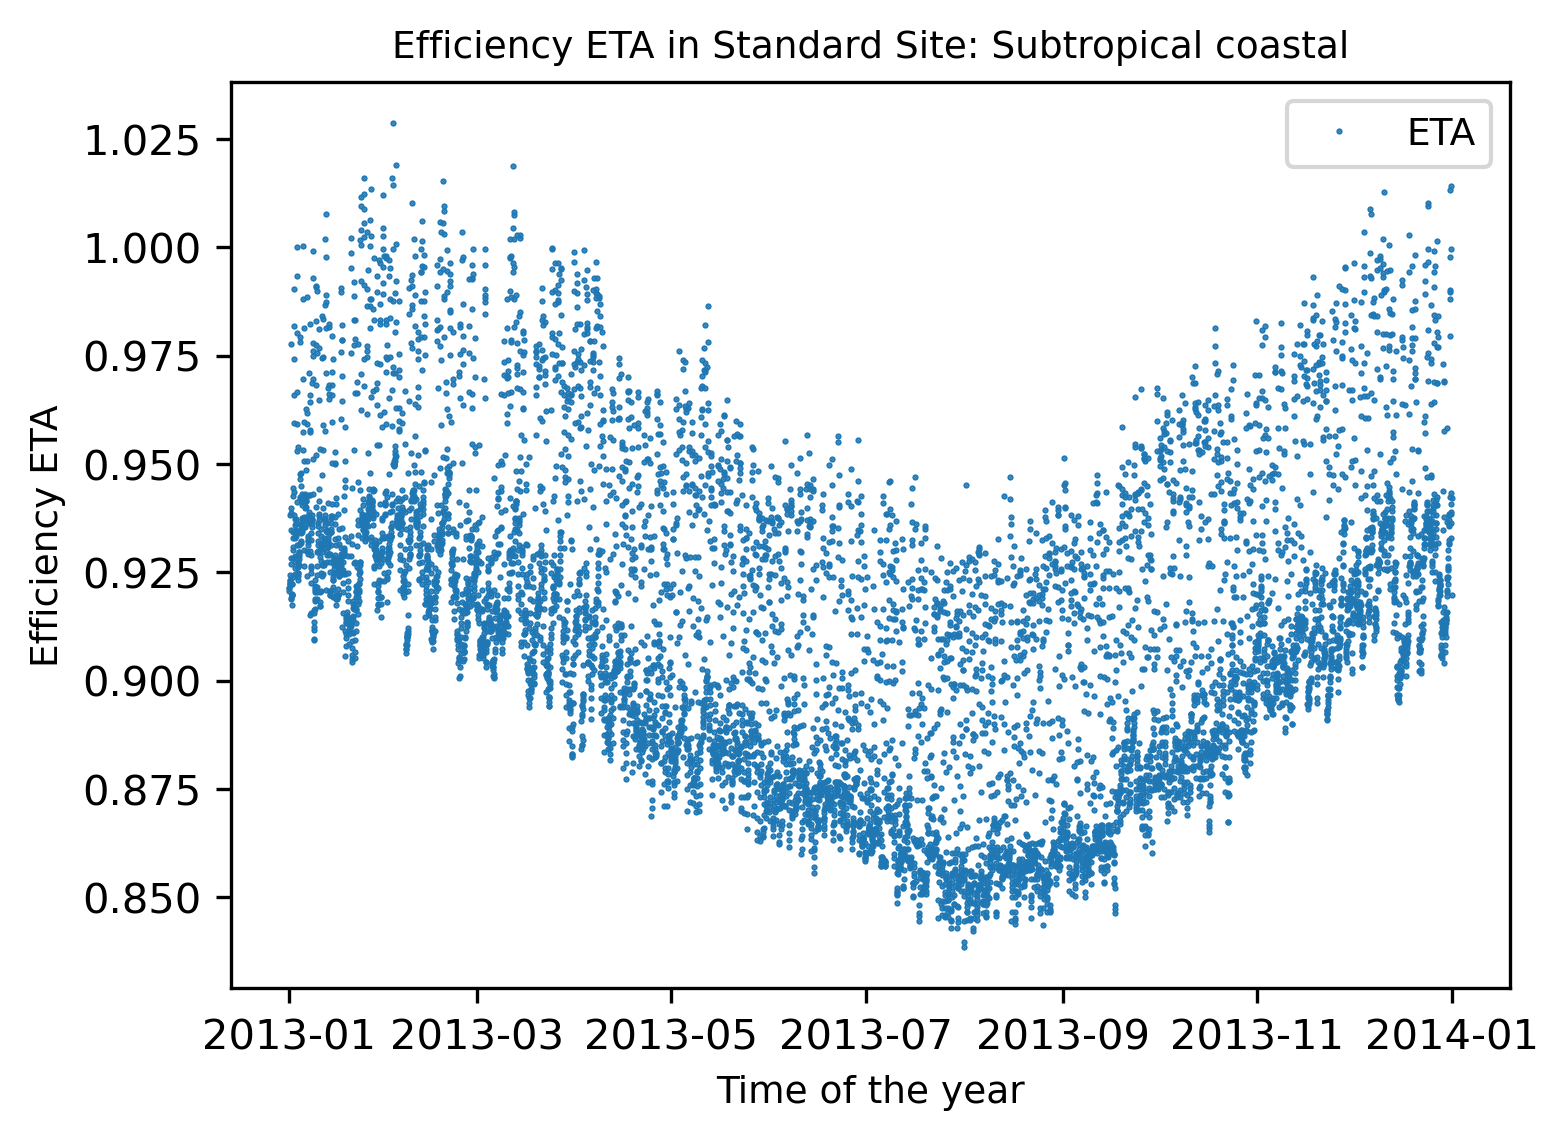

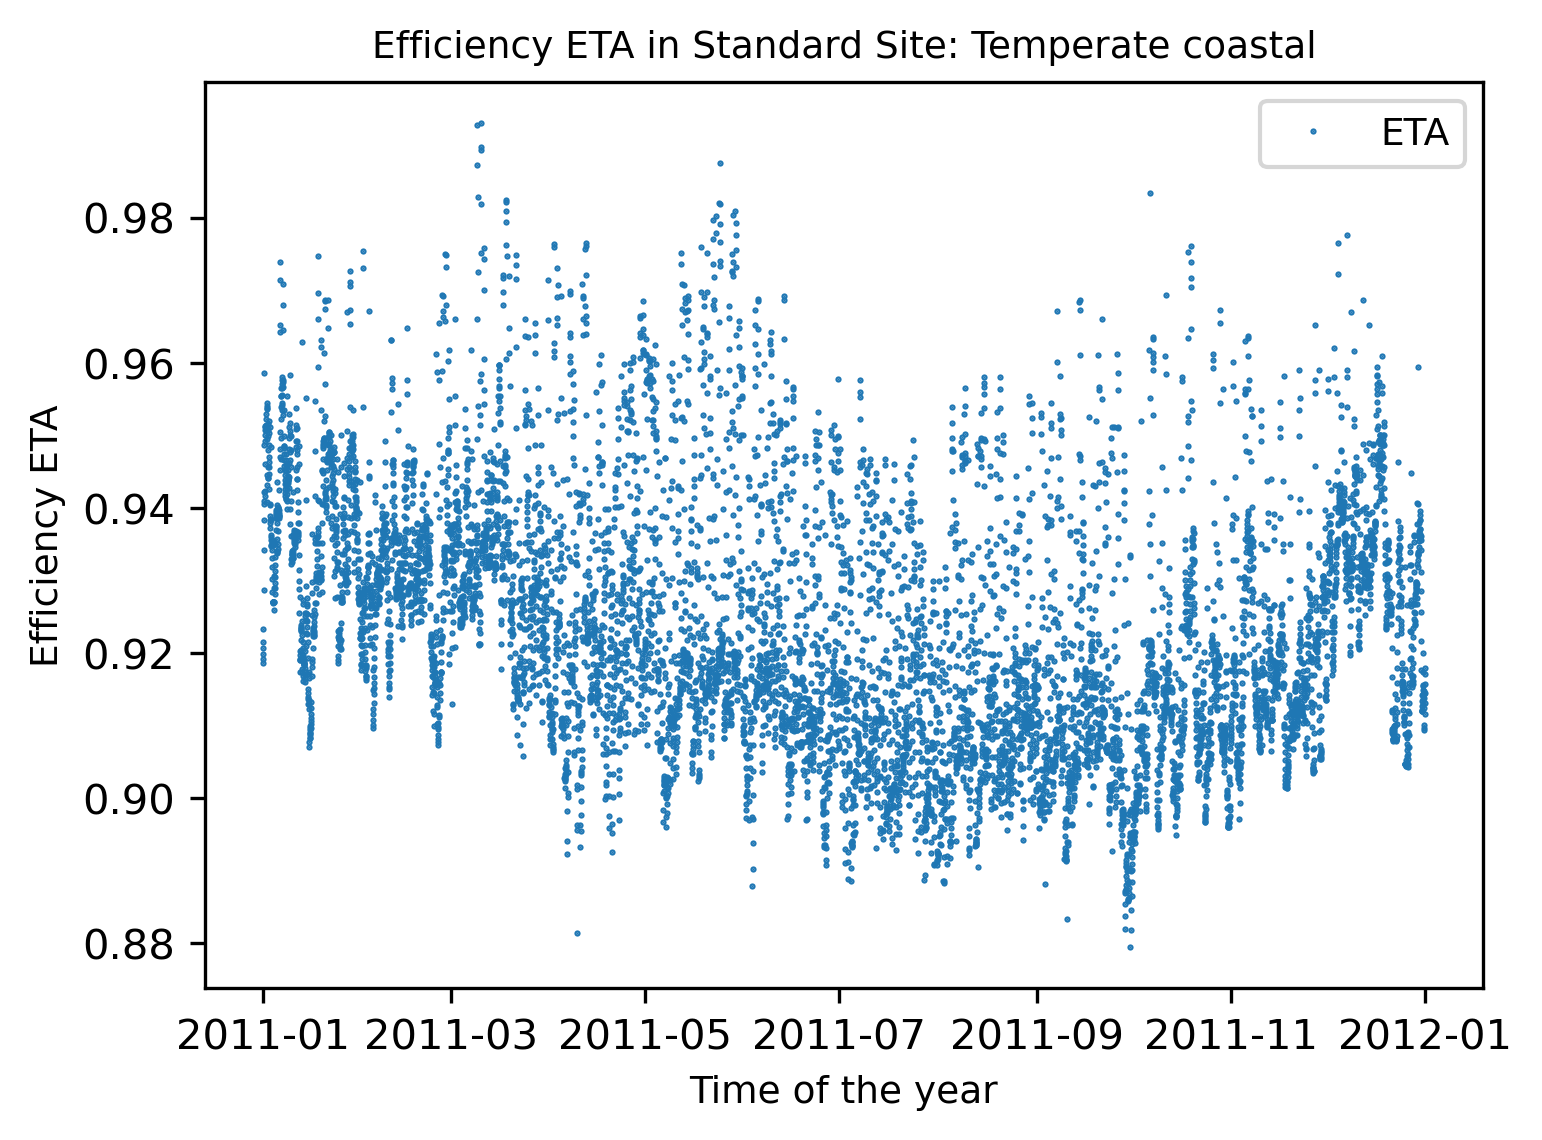

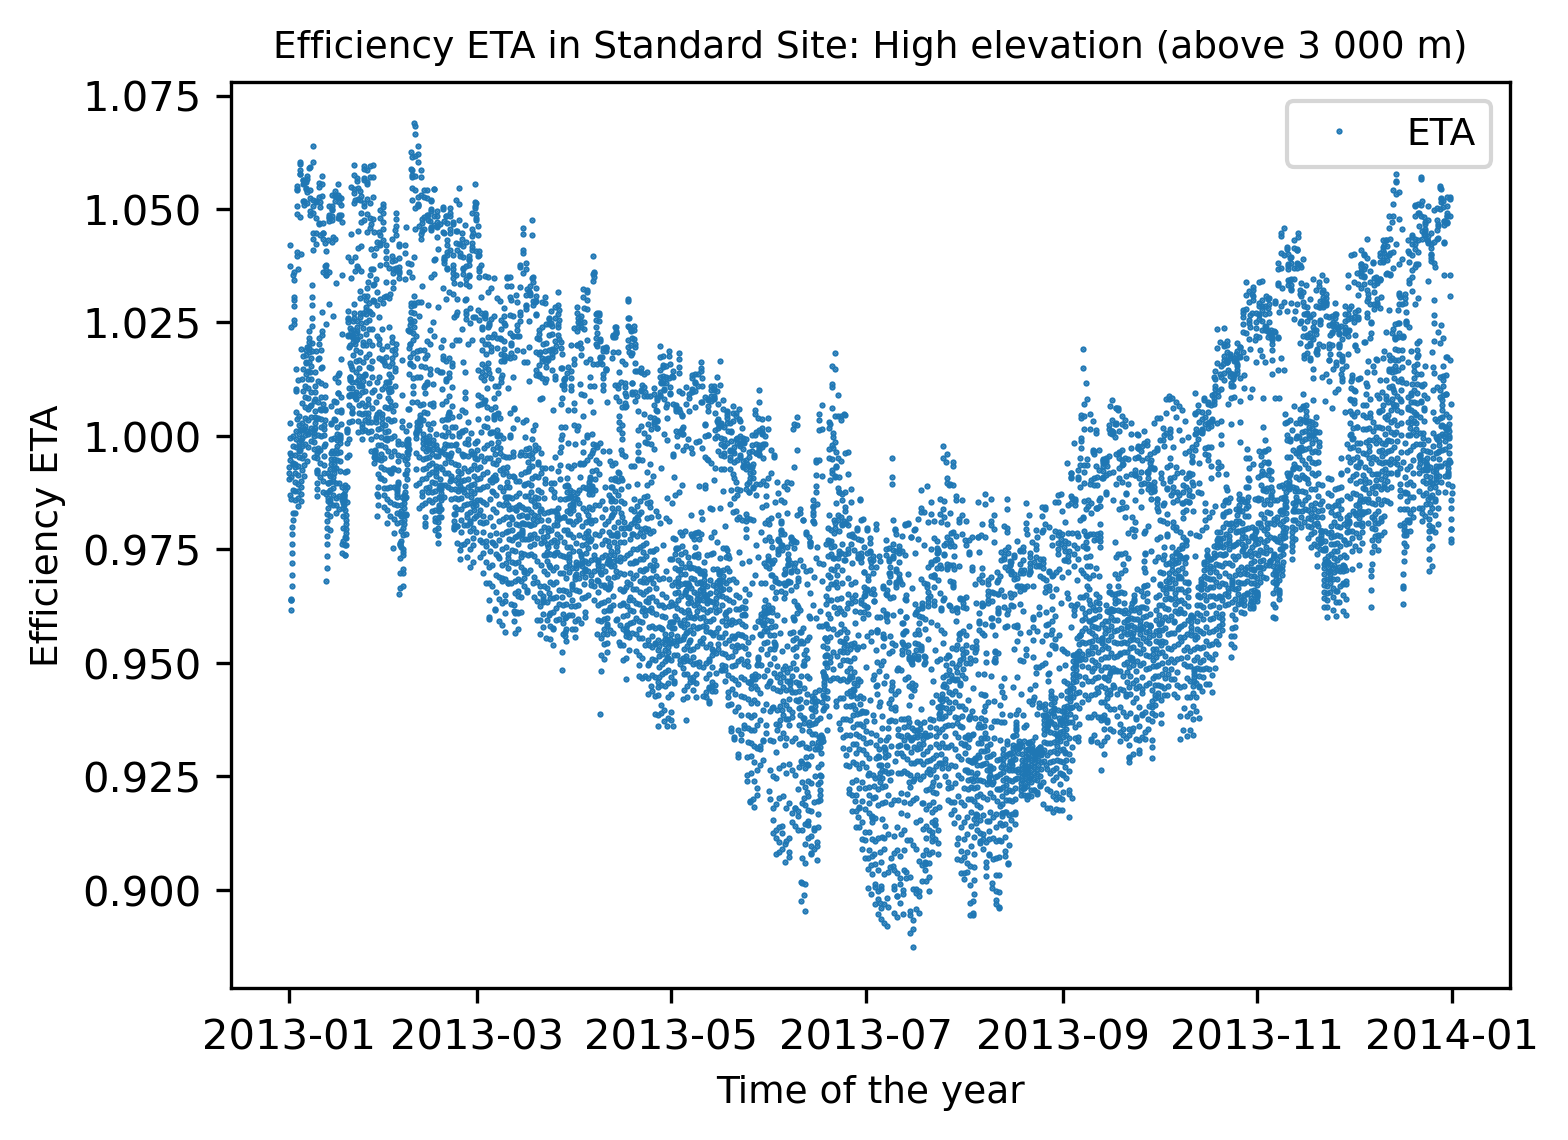

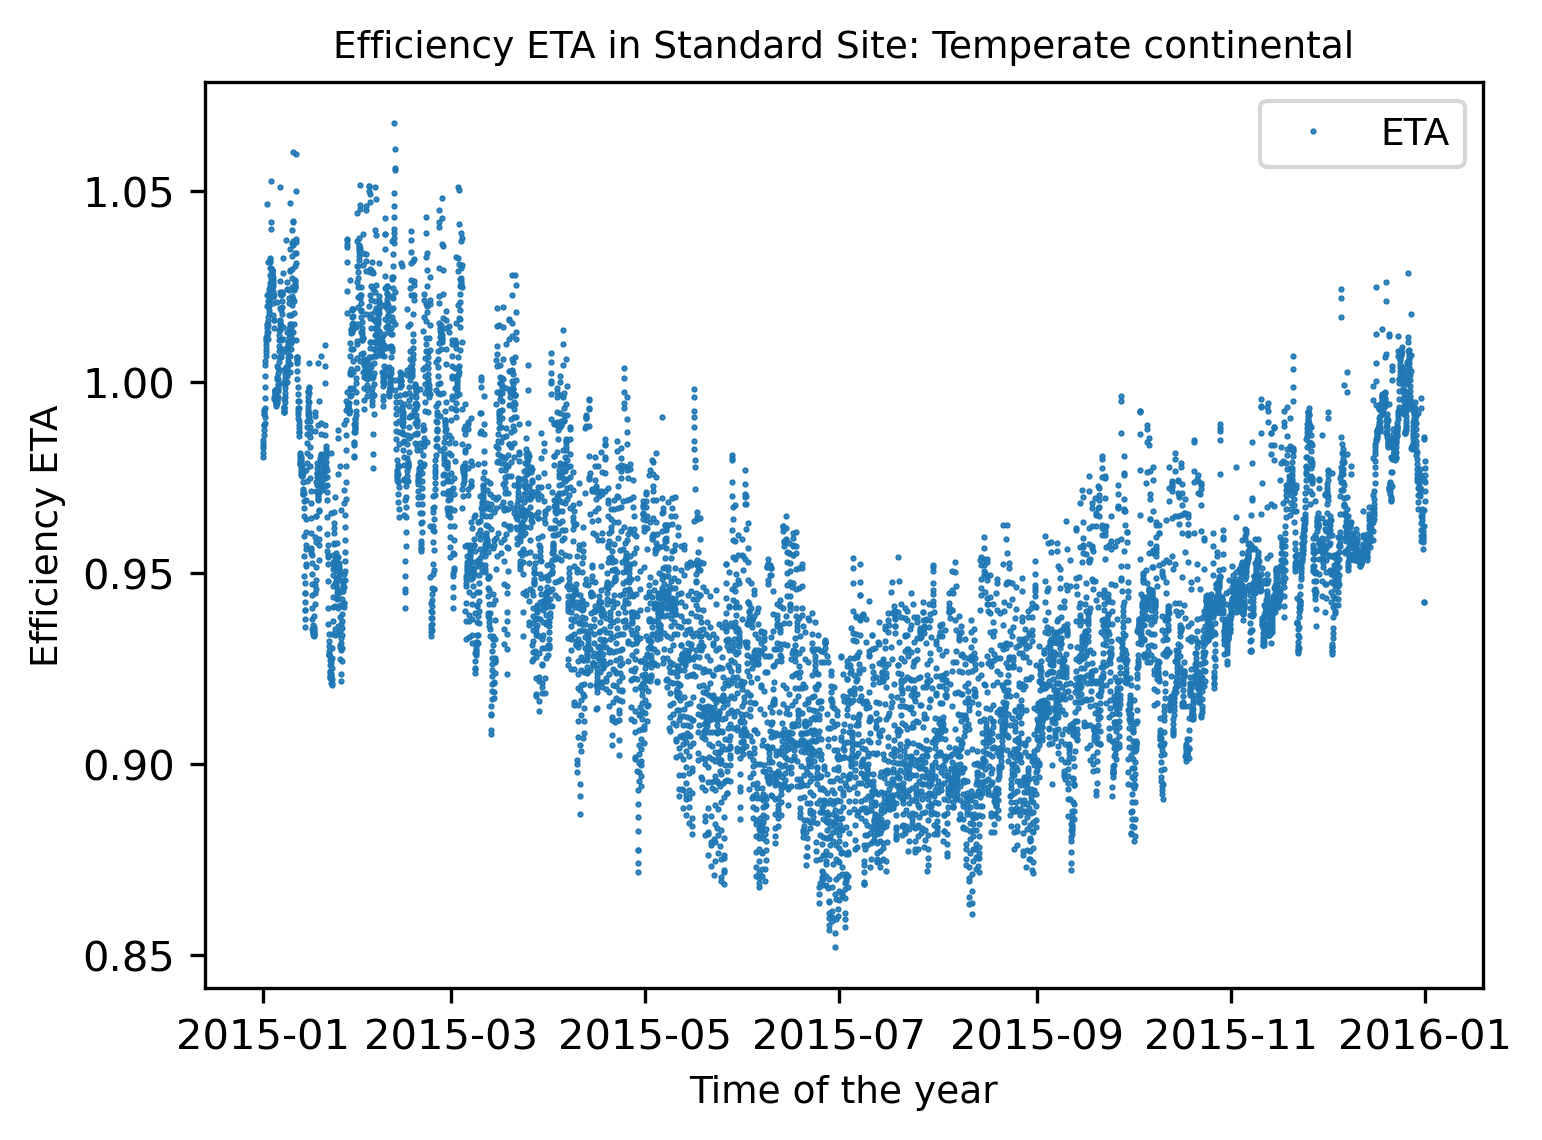

In [44]:
climate = []
cser = []
eta = []
for location in range(6):
    std_location = read_functions.read_standard_locations(location)
    # Getting initial data
    (eta_interpolated, pnom, eta_matrix,
     climate_data, alpha) = run.get_ini_data(
                module_df = power_matrix,
                eta= False,
                module_area = module_area,
                folder_locations=folder_locations,
                site_name=std_location["loc"])
                
    # Running simulations
    sim_er_df, ret_df = run.get_simulation(
        climate_data=climate_data,
        lat=std_location["site_lat"],
        lon=std_location["site_lon"],
        ele=std_location["site_ele"],
        alpha=alpha,
        tech=tech,
        pnom=pnom,
        mod_area=module_area,
        eta_interpolated=eta_interpolated,
        u0=u0,
        u1=u1,
        pv_azimuth=std_location["pv_azimuth"],
        pv_tilt=std_location["pv_tilt"],
        a_r=ar,
        spec_resp_factor=spec_resp)
    
    climate.append(std_location["site_name"])
    cser.append(pd.to_numeric(ret_df["cser_ER"]))
    eta.append(pd.to_numeric(ret_df["eta_avg_ER"]))
    
    # Plot ETA
    plotting.plot_eta(df = sim_er_df,
                      res_folder= r'O:\200\290_AMK\90_Studenten\Mariella_Rivera\phD\ER_Software-Benchmarking\energy_rating_v05_MR\Results\eta_plots',
                      mod_parameters = mod_parameters,
                      location = std_location)

## Dataframe with results

In [53]:
# Generate dataframe with results for the 6 standard climates   
results_df = pd.DataFrame(
                {"Std_climate": climate,
                 "CSER": cser,
                 "ETA": eta})

results_df["Std_climate"] = results_df["Std_climate"].astype(str)
results_df["CSER"] = results_df["CSER"].apply(pd.to_numeric, downcast='float', errors='coerce')
results_df["ETA"] = results_df["ETA"].apply(pd.to_numeric, downcast='float', errors='coerce')
results_df

,Std_climate,CSER,ETA
0,Tropical humid,0.916571,0.126316
1,Subtropical arid (desert),0.927518,0.127847
2,Subtropical coastal,0.946130,0.128763
3,Temperate coastal,0.940028,0.128983
4,High elevation (above 3 000 m),1.001671,0.137861
5,Temperate continental,0.950242,0.131182


## CSER for the 6 standard climates

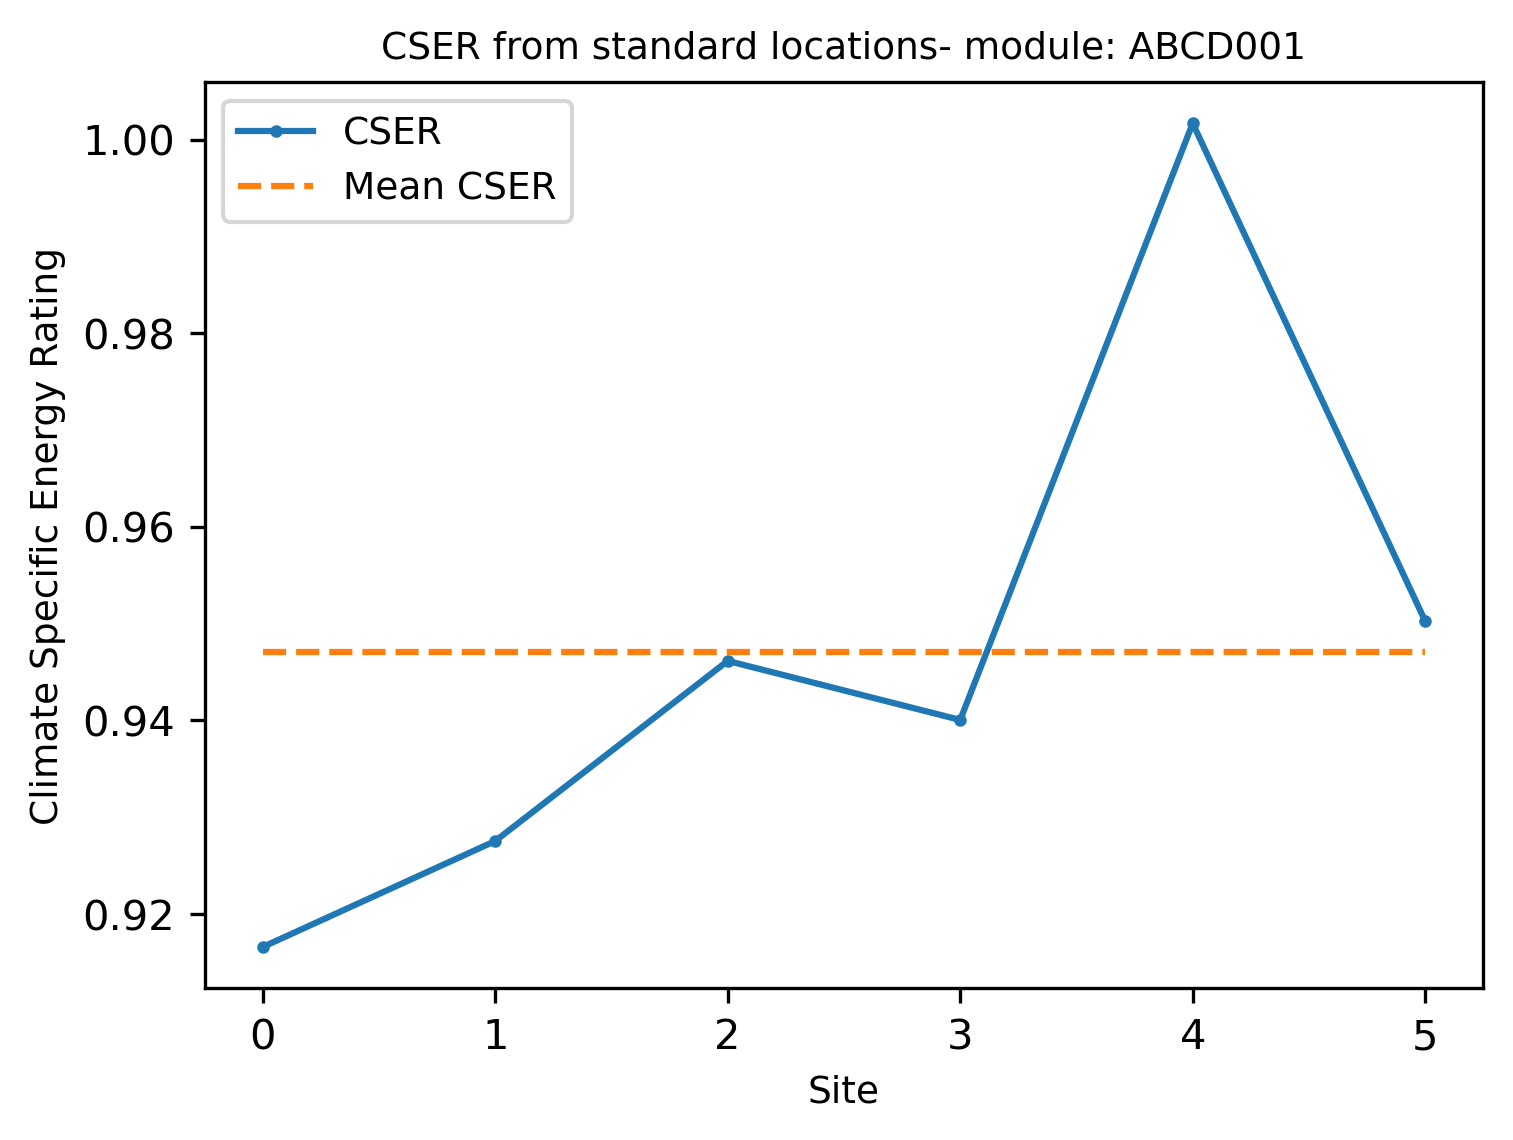

In [54]:
# Plot CSER
plotting.plot_cser(df = results_df,
                  res_folder= r'O:\200\290_AMK\90_Studenten\Mariella_Rivera\phD\ER_Software-Benchmarking\energy_rating_v05_MR\Results\cser_plots',
                  mod_parameters = mod_parameters)